In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
len(cities)

602

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

from citipy import citipy

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | ahipara
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | mafinga
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | gushikawa
Processing Record 11 of Set 1 | bababe
City not found. Skipping...
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | bukachacha
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | demyanovo
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | namatanai
Process

Processing Record 39 of Set 4 | tessalit
Processing Record 40 of Set 4 | griffith
Processing Record 41 of Set 4 | yurgamysh
Processing Record 42 of Set 4 | sioux lookout
Processing Record 43 of Set 4 | weiser
Processing Record 44 of Set 4 | hilo
Processing Record 45 of Set 4 | high level
Processing Record 46 of Set 4 | porto novo
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | meulaboh
Processing Record 49 of Set 4 | mount gambier
Processing Record 50 of Set 4 | ayolas
Processing Record 1 of Set 5 | port hedland
Processing Record 2 of Set 5 | faya
Processing Record 3 of Set 5 | cedar city
Processing Record 4 of Set 5 | lagoa
Processing Record 5 of Set 5 | komsomolskiy
Processing Record 6 of Set 5 | kuche
City not found. Skipping...
Processing Record 7 of Set 5 | carnarvon
Processing Record 8 of Set 5 | chingirlau
Processing Record 9 of Set 5 | banda aceh
Processing Record 10 of Set 5 | karakendzha
City not found. Skipping...
Processing Record 11 of Set 5 |

Processing Record 25 of Set 8 | benghazi
Processing Record 26 of Set 8 | saint-augustin
Processing Record 27 of Set 8 | touros
Processing Record 28 of Set 8 | cayenne
Processing Record 29 of Set 8 | hambantota
Processing Record 30 of Set 8 | bargal
City not found. Skipping...
Processing Record 31 of Set 8 | gualeguay
Processing Record 32 of Set 8 | guerrero
Processing Record 33 of Set 8 | flagstaff
Processing Record 34 of Set 8 | cascais
Processing Record 35 of Set 8 | hubli
Processing Record 36 of Set 8 | luena
Processing Record 37 of Set 8 | montepuez
Processing Record 38 of Set 8 | porto santo
Processing Record 39 of Set 8 | muros
Processing Record 40 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 41 of Set 8 | arman
Processing Record 42 of Set 8 | jitauna
Processing Record 43 of Set 8 | araouane
Processing Record 44 of Set 8 | sinaloa
Processing Record 45 of Set 8 | lompoc
Processing Record 46 of Set 8 | dong hoi
Processing Record 47 of Set 8 | aquiraz
Processing Record 48 

Processing Record 13 of Set 12 | rio grande
Processing Record 14 of Set 12 | lamu
Processing Record 15 of Set 12 | zhangjiakou
Processing Record 16 of Set 12 | griffin
Processing Record 17 of Set 12 | catuday
Processing Record 18 of Set 12 | valentin gomez farias
Processing Record 19 of Set 12 | ankazoabo
Processing Record 20 of Set 12 | constitucion
Processing Record 21 of Set 12 | gat
Processing Record 22 of Set 12 | manggar
Processing Record 23 of Set 12 | porbandar
Processing Record 24 of Set 12 | olinda
Processing Record 25 of Set 12 | coronado
Processing Record 26 of Set 12 | qianan
Processing Record 27 of Set 12 | brcko
Processing Record 28 of Set 12 | warrington
Processing Record 29 of Set 12 | makakilo city
Processing Record 30 of Set 12 | verkhoyansk
Processing Record 31 of Set 12 | ranong
Processing Record 32 of Set 12 | lieksa
Processing Record 33 of Set 12 | gigmoto
Processing Record 34 of Set 12 | santa ana arriba
Processing Record 35 of Set 12 | acari
Processing Record 3

In [9]:
len(city_data)

548

In [10]:
#array of dictionaries to DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,59.49,61,0,12.77,AU,2022-11-05 23:48:18
1,Yellowknife,62.4560,-114.3525,3.72,78,40,12.66,CA,2022-11-05 23:44:33
2,Ahipara,-35.1667,173.1667,66.58,50,100,1.21,NZ,2022-11-05 23:48:18
3,Ponta Do Sol,32.6667,-17.1000,68.72,87,50,3.87,PT,2022-11-05 23:48:18
4,Mafinga,-7.2500,35.0667,72.93,46,97,4.25,TZ,2022-11-05 23:48:19
5,Rikitea,-23.1203,-134.9692,71.28,73,70,16.58,PF,2022-11-05 23:48:19
6,Ushuaia,-54.8000,-68.3000,51.46,76,0,13.80,AR,2022-11-05 23:48:19
7,Gushikawa,26.3544,127.8686,70.83,70,75,10.36,JP,2022-11-05 23:48:19
8,Hermanus,-34.4187,19.2345,60.80,92,53,8.75,ZA,2022-11-05 23:48:20
9,Bukachacha,52.9833,116.9167,9.54,94,14,2.89,RU,2022-11-05 23:48:20


In [11]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-11-05 23:48:18,-33.6500,115.3333,59.49,61,0,12.77
1,Yellowknife,CA,2022-11-05 23:44:33,62.4560,-114.3525,3.72,78,40,12.66
2,Ahipara,NZ,2022-11-05 23:48:18,-35.1667,173.1667,66.58,50,100,1.21
3,Ponta Do Sol,PT,2022-11-05 23:48:18,32.6667,-17.1000,68.72,87,50,3.87
4,Mafinga,TZ,2022-11-05 23:48:19,-7.2500,35.0667,72.93,46,97,4.25
5,Rikitea,PF,2022-11-05 23:48:19,-23.1203,-134.9692,71.28,73,70,16.58
6,Ushuaia,AR,2022-11-05 23:48:19,-54.8000,-68.3000,51.46,76,0,13.80
7,Gushikawa,JP,2022-11-05 23:48:19,26.3544,127.8686,70.83,70,75,10.36
8,Hermanus,ZA,2022-11-05 23:48:20,-34.4187,19.2345,60.80,92,53,8.75
9,Bukachacha,RU,2022-11-05 23:48:20,52.9833,116.9167,9.54,94,14,2.89


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

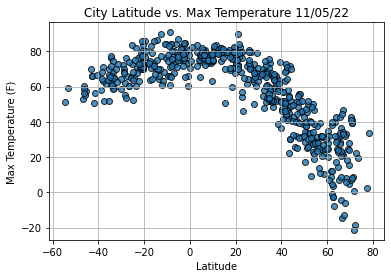

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

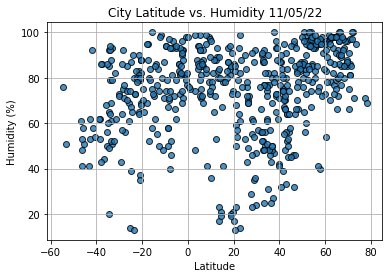

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

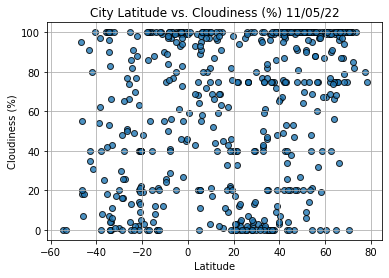

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

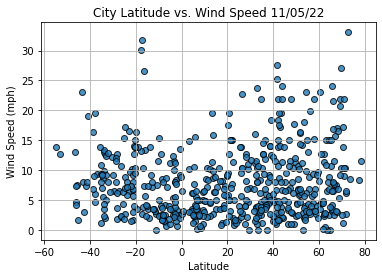

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

Finding Correlation


In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Yellowknife,CA,2022-11-05 23:44:33,62.4560,-114.3525,3.72,78,40,12.66
3,Ponta Do Sol,PT,2022-11-05 23:48:18,32.6667,-17.1000,68.72,87,50,3.87
7,Gushikawa,JP,2022-11-05 23:48:19,26.3544,127.8686,70.83,70,75,10.36
9,Bukachacha,RU,2022-11-05 23:48:20,52.9833,116.9167,9.54,94,14,2.89
11,Qaanaaq,GL,2022-11-05 23:48:21,77.4840,-69.3632,2.53,71,80,8.28


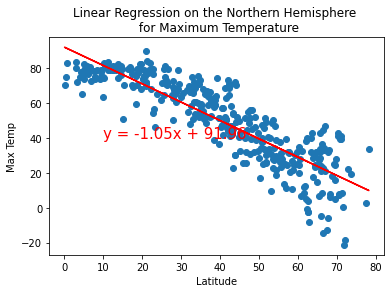

In [22]:
#Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (10,40))

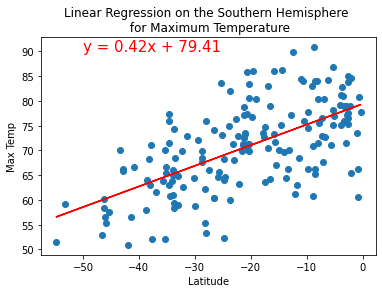

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

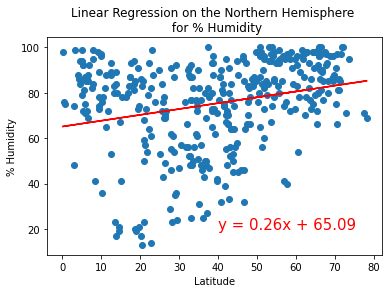

In [30]:
#Linear regression on the Northern Hemisphere (Humidity)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (40,20))

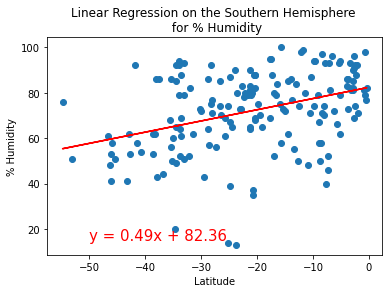

In [31]:
#Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-50,15))

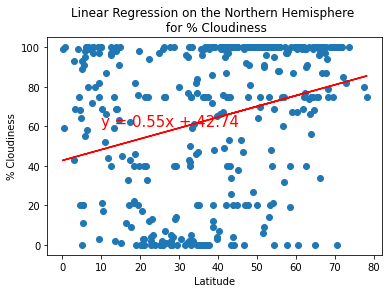

In [32]:
#Linear regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (10,60))

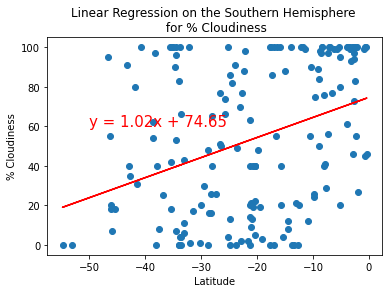

In [33]:
#Linear regression on the Southern Hemisphere (Cloudiness)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (-50,60))

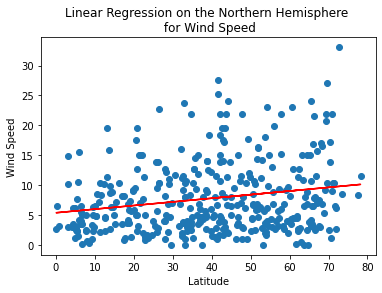

In [34]:
#Linear regression on the Northern Hemisphere (Wind Speed)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (40,35))

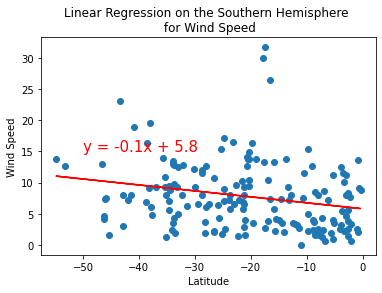

In [35]:
#Linear regression on the Southern Hemisphere (Wind Speed)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (-50,15))